<a href="https://colab.research.google.com/github/jaykimm99/CP2/blob/main/Instacart_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instacart Market Basket Analysis


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
sns.set_palette("pastel")

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

In [ ]:
# plt에서 한글 폰트 설정
 
plt.rc('font', family='NanumBarunGothic')

In [78]:
# sns 한글 폰트 인식 
# 이 셀 실행 -> 런타임 다시연결 -> 이 셀 빼고 돌리기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# 구글 드라이브 연동

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# 파일 불러오기

aisles_df = pd.read_csv('/content/drive/MyDrive/Instacart Market Basket Analysis/aisles.csv')
departments_df = pd.read_csv('/content/drive/MyDrive/Instacart Market Basket Analysis/departments.csv')
order_products_prior_df = pd.read_csv('/content/drive/MyDrive/Instacart Market Basket Analysis/order_products__prior.csv')
# order_products_train_df = pd.read_csv('/content/drive/MyDrive/Instacart Market Basket Analysis/order_products__train.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Instacart Market Basket Analysis/orders.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Instacart Market Basket Analysis/products.csv')

# 클론 코딩

In [ ]:
departments_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
aisles_df['aisle'].unique()

array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

In [ ]:
orders_df.info()
orders_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [ ]:
orders_df['order_id'].nunique()

3421083

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

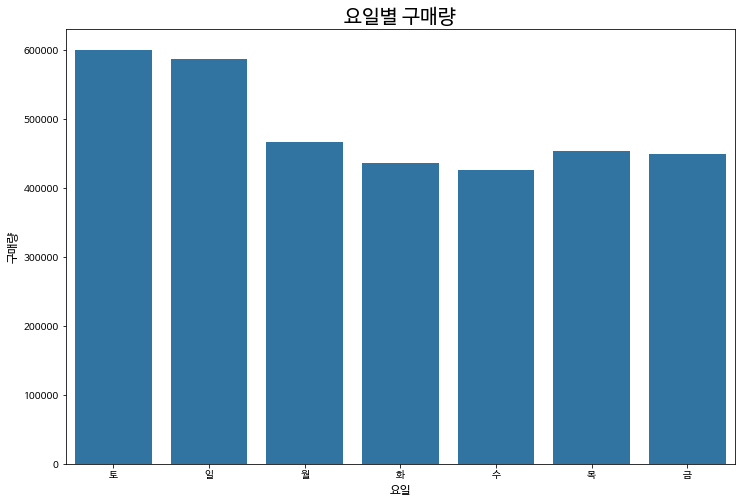

In [ ]:
# 요일별 구매량

plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders_df, color=color[0]) 

plt.rc('font', family='NanumBarunGothic')

plt.xlabel('요일', fontsize=12)
plt.ylabel('구매량', fontsize=12)
plt.xticks([2,3,4,5,6,0,1],['월','화','수','목','금','토','일'])
plt.title("요일별 구매량", fontsize=20)
plt.show()

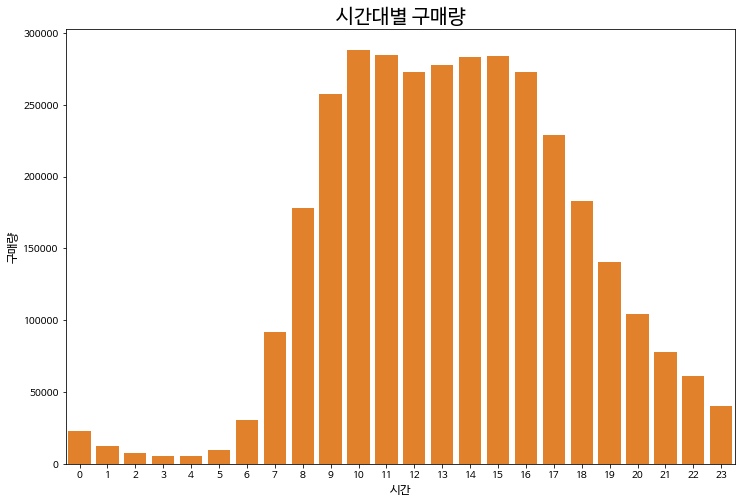

In [ ]:
# 시간대별 구매량

plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders_df, color=color[1])
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('구매량', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.title("시간대별 구매량", fontsize=20)
plt.show()

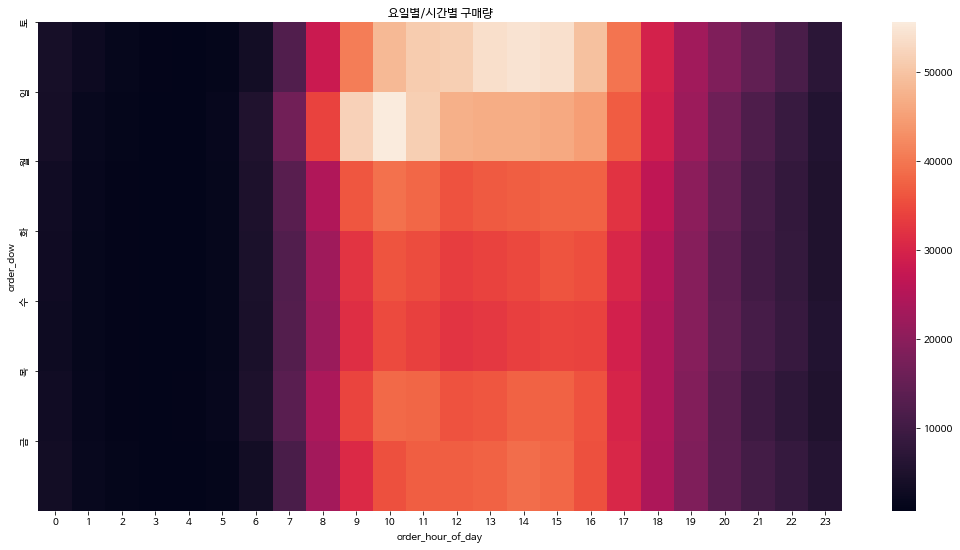

In [ ]:
# 요일별 / 시간대별 구매량

grouped_df = orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df = grouped_df.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize = (18,9))
sns.heatmap(grouped_df)
plt.rc('font', family='NanumBarunGothic')
plt.title('요일별/시간별 구매량')
plt.yticks([2,3,4,5,6,0,1],['월','화','수','목','금','토','일'])
plt.show()

Text(0.5, 1.0, '재주문 주기')

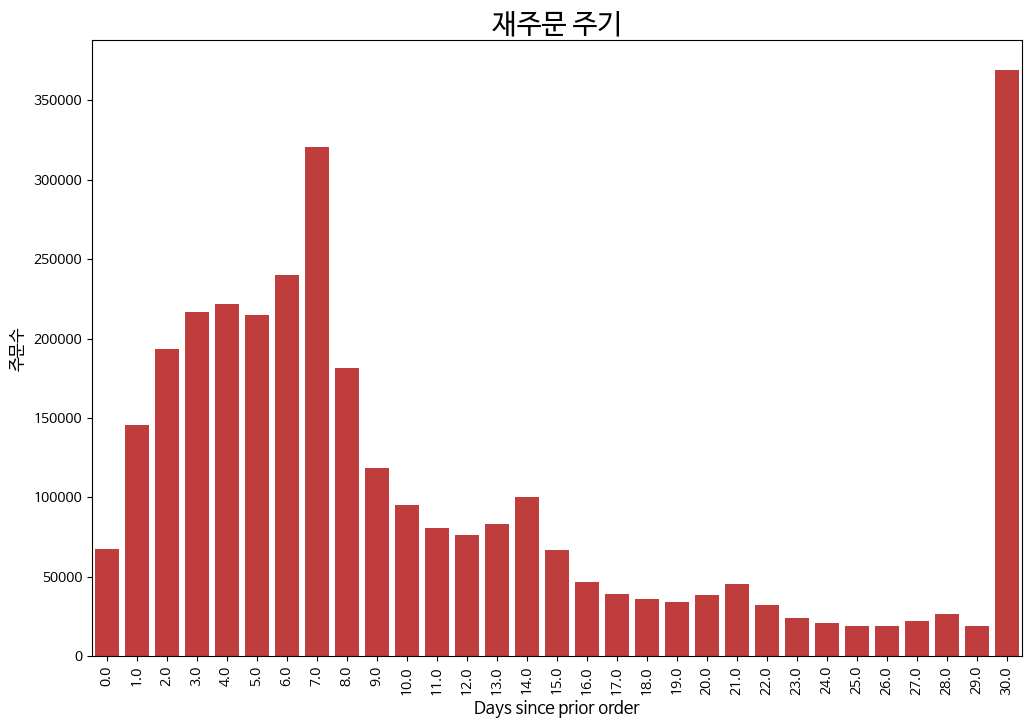

In [ ]:
# 구매(재주문) 주기 분석
plt.figure(figsize=(12,8))
sns.countplot(x='days_since_prior_order', data= orders_df, color=color[3])
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('주문수',fontsize=12)
plt.xlabel('Days since prior order', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('재주문 주기', fontsize=20)

# 한달 단위가 제일 많고 그 다음이 일주일 단위

In [ ]:
order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [ ]:
# 판매개수 높은 제품 확인

cnt_srs = order_products_prior_df['product_name'].value_counts().sort_values(ascending=False).reset_index().head(20)
cnt_srs.columns = ['제품 이름','판매 개수']
cnt_srs

# organic 제품이 대다수의 상위권을 차지한 것을 알 수 있다

,제품 이름,판매 개수
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


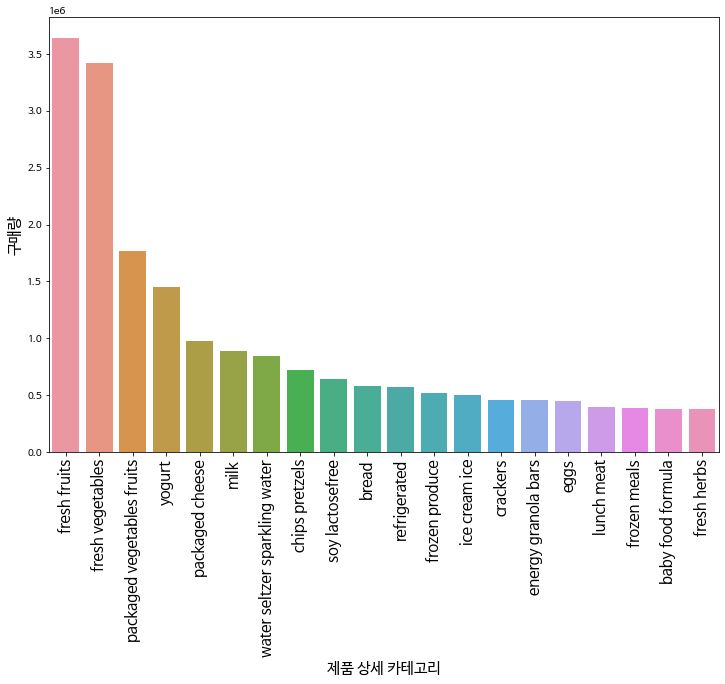

In [ ]:
# 제품 카테고리별 판매량

cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
plt.rc('font', family='NanumBarunGothic')
sns.barplot(x=cnt_srs.index, y=cnt_srs)
plt.xlabel('제품 상세 카테고리' , fontsize= 15)
plt.ylabel('구매량', fontsize= 15)
plt.xticks(fontsize = 15, rotation='vertical')
plt.show()

# 전체 join 한번에


In [13]:
all_df = pd.merge(order_products_prior_df, orders_df, on='order_id', how='left')
all_df = pd.merge(all_df, products_df, on='product_id', how='left')
all_df = pd.merge(all_df, aisles_df, on='aisle_id', how='left')
all_df = pd.merge(all_df, departments_df, on='department_id', how='left')
all_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry


In [11]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.9+ GB


# 제품별, 카테고리별 재구매

In [6]:
# 제품별 판매개수
cnt_srs = all_df['product_name'].value_counts().sort_values(ascending=False).reset_index()
cnt_srs.columns = ['제품 이름','판매 개수']
cnt_srs.head(20)

,제품 이름,판매 개수
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


In [7]:
cnt_srs.to_excel('cnt_srs.xlsx')

In [8]:
# 제품명, 카테고리, 재주문 여부, 재주문 기간
product_reorder_df = all_df[['product_name', 'aisle', 'department', 'reordered', 'days_since_prior_order']]
product_reorder_df.head()

,product_name,aisle,department,reordered,days_since_prior_order
0,Organic Egg Whites,eggs,dairy eggs,1,8.0
1,Michigan Organic Kale,fresh vegetables,produce,1,8.0
2,Garlic Powder,spices seasonings,pantry,0,8.0
3,Coconut Butter,oils vinegars,pantry,1,8.0
4,Natural Sweetener,baking ingredients,pantry,0,8.0


In [10]:
# 제품별 재주문 개수 정리
df_reordered_counts = product_reorder_df.groupby('product_name')['reordered'].sum().sort_values(ascending=False).reset_index(name='reordered_count')
df_reordered_counts.columns = ['제품 이름', '재주문 개수']

In [11]:
# 상위 20개 확인
df_reordered_counts.head(20)

,제품 이름,재주문 개수
0,Banana,398609
1,Bag of Organic Bananas,315913
2,Organic Strawberries,205845
3,Organic Baby Spinach,186884
4,Organic Hass Avocado,170131
5,Organic Avocado,134044
6,Organic Whole Milk,114510
7,Large Lemon,106255
8,Organic Raspberries,105409
9,Strawberries,99802


In [12]:
df_reordered_counts.to_excel('df_reordered_counts.xlsx')

In [13]:
df_reordered_counts['재주문 개수'] = df_reordered_counts['재주문 개수'].astype(float)

In [14]:
cnt_srs['판매 개수'] = cnt_srs['판매 개수'].astype(float)

In [ ]:
df_reordered_counts.info()

In [ ]:
cnt_srs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49677 entries, 0 to 49676
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제품 이름   49677 non-null  object
 1   판매 개수   49677 non-null  object
dtypes: object(2)
memory usage: 776.3+ KB


In [15]:
# 제품별 재주문 비율 확인

merged_df = pd.merge(df_reordered_counts, cnt_srs, on='제품 이름', how='left')
merged_df['재주문 비율'] = merged_df['재주문 개수'] / merged_df['판매 개수']
result_df = merged_df[['제품 이름', '재주문 비율']]
result_df = result_df.sort_values(by='재주문 비율', ascending=False)
result_df.head(20)

,제품 이름,재주문 비율
16415,Raw Veggie Wrappers,0.941176
14748,Serenity Ultimate Extrema Overnight Pads,0.931034
29587,Orange Energy Shots,0.923077
13812,Chocolate Love Bar,0.920792
21692,Soy Powder Infant Formula,0.914286
19848,Simply Sleep Nighttime Sleep Aid,0.911111
25449,"Energy Shot, Grape Flavor",0.909091
17638,Sparking Water,0.900000
22953,Russian River Valley Reserve Pinot Noir,0.900000
14048,Maca Buttercups,0.900000


In [16]:
result_df.to_excel('result_df.xlsx')

In [ ]:
result_df['재주문 비율'].mean()

In [ ]:
result_df['재주문 비율'].median()

In [ ]:
result_df['재주문 비율'].describe()

In [17]:
result_df.rename(columns={"제품 이름": "product_name"}, inplace=True)
all_df_subset = all_df[['product_name', 'aisle', 'department']]

combine_df = pd.merge(result_df, all_df_subset, on='product_name', how='left')
#result_df = result_df.sort_values(by='재주문 비율', ascending=False)
combine_df

#result_df = result_df.merge(all_df_subset, on='product_name', how='left')
#result_df

,product_name,재주문 비율,aisle,department
0,Raw Veggie Wrappers,0.941176,prepared meals,deli
1,Raw Veggie Wrappers,0.941176,prepared meals,deli
2,Raw Veggie Wrappers,0.941176,prepared meals,deli
3,Raw Veggie Wrappers,0.941176,prepared meals,deli
4,Raw Veggie Wrappers,0.941176,prepared meals,deli
...,...,...,...,...
32434484,Hydrating Coconut Lotion,0.000000,body lotions soap,personal care
32434485,Hydrating Coconut Lotion,0.000000,body lotions soap,personal care
32434486,Hydrating Coconut Lotion,0.000000,body lotions soap,personal care
32434487,Hydrating Coconut Lotion,0.000000,body lotions soap,personal care


In [18]:
# 중복값 제거

drop_combine_df = combine_df.drop_duplicates(ignore_index = True)
drop_combine_df

,product_name,재주문 비율,aisle,department
0,Raw Veggie Wrappers,0.941176,prepared meals,deli
1,Serenity Ultimate Extrema Overnight Pads,0.931034,feminine care,personal care
2,Orange Energy Shots,0.923077,energy sports drinks,beverages
3,Chocolate Love Bar,0.920792,candy chocolate,snacks
4,Soy Powder Infant Formula,0.914286,baby food formula,babies
...,...,...,...,...
49672,Whoopie Sweet Cream Ice Cream,0.000000,ice cream ice,frozen
49673,Halogen Soft White 53 Watt Light Bulbs,0.000000,more household,household
49674,Vicks DayQuil and NyQuil Cold & Flu Relief Combo,0.000000,cold flu allergy,personal care
49675,Hydrating Coconut Lotion,0.000000,body lotions soap,personal care


In [19]:
drop_combine_df.to_excel('drop_combine_df.xlsx')

In [24]:
aisle_counts = drop_combine_df['aisle'].value_counts(dropna = False, ascending = False).reset_index()
aisle_counts.columns = ['aisle', 'count']
aisle_counts

,aisle,count
0,missing,1255
1,candy chocolate,1246
2,ice cream ice,1091
3,vitamins supplements,1038
4,yogurt,1026
...,...,...
129,frozen juice,47
130,baby accessories,44
131,packaged produce,32
132,bulk grains rice dried goods,26


In [25]:
aisle_ratio = drop_combine_df['aisle'].value_counts(dropna = False, normalize = True).reset_index()
aisle_ratio.columns = ['aisle', 'ratio']
aisle_ratio

,aisle,ratio
0,missing,0.025263
1,candy chocolate,0.025082
2,ice cream ice,0.021962
3,vitamins supplements,0.020895
4,yogurt,0.020653
...,...,...
129,frozen juice,0.000946
130,baby accessories,0.000886
131,packaged produce,0.000644
132,bulk grains rice dried goods,0.000523


In [26]:
# aisle 별 재주문 개수와 비율

aisle_reorder_df = pd.merge(aisle_counts, aisle_ratio, on='aisle', how='left')
aisle_reorder_df

,aisle,count,ratio
0,missing,1255,0.025263
1,candy chocolate,1246,0.025082
2,ice cream ice,1091,0.021962
3,vitamins supplements,1038,0.020895
4,yogurt,1026,0.020653
...,...,...,...
129,frozen juice,47,0.000946
130,baby accessories,44,0.000886
131,packaged produce,32,0.000644
132,bulk grains rice dried goods,26,0.000523


In [27]:
aisle_reorder_df.to_excel('aisle_reorder_df.xlsx')

In [29]:
# department 별 재주문 개수와 비율

department_counts = drop_combine_df['department'].value_counts(dropna = False, ascending = False).reset_index()
department_counts.columns = ['department', 'count']

department_ratio = drop_combine_df['department'].value_counts(dropna = False, normalize = True).reset_index()
department_ratio.columns = ['department', 'ratio']

department_reorder_df = pd.merge(department_counts, department_ratio, on='department', how='left')
department_reorder_df

,department,count,ratio
0,personal care,6563,0.132113
1,snacks,6263,0.126074
2,pantry,5370,0.108098
3,beverages,4363,0.087827
4,frozen,4007,0.080661
5,dairy eggs,3448,0.069408
6,household,3083,0.062061
7,canned goods,2092,0.042112
8,dry goods pasta,1858,0.037402
9,produce,1684,0.033899


In [31]:
department_reorder_df['ratio'].sum()

1.0

In [30]:
department_reorder_df.to_excel('department_reorder_df.xlsx')

In [5]:
# department_reorder_df 불러오기

department_reorder_df = pd.read_excel('/content/drive/MyDrive/Instacart Market Basket Analysis/Backup/department_reorder_df.xlsx')

Text(0.5, 1.0, 'Department Reorder Count')

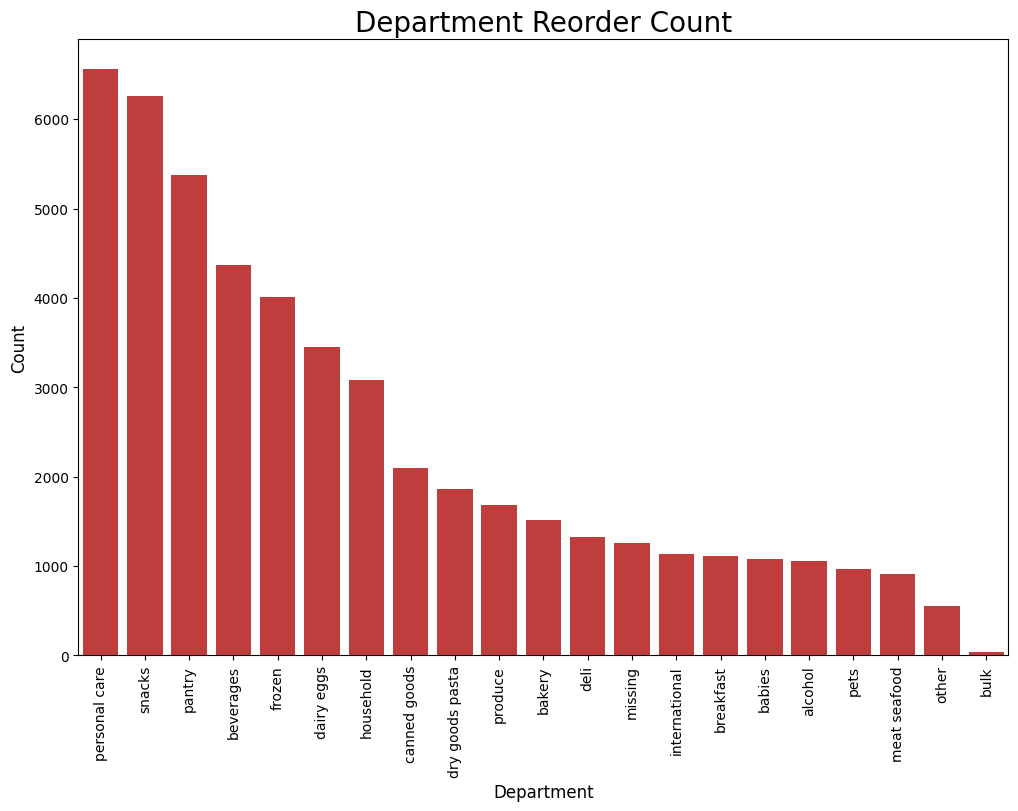

In [9]:
# Department Reorder

plt.figure(figsize=(12,8))
sns.barplot(x='department', y = 'count', data= department_reorder_df, color=color[3])
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Department', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('Department Reorder Count', fontsize=20)


Text(0.5, 1.0, 'Department Reorder Count')

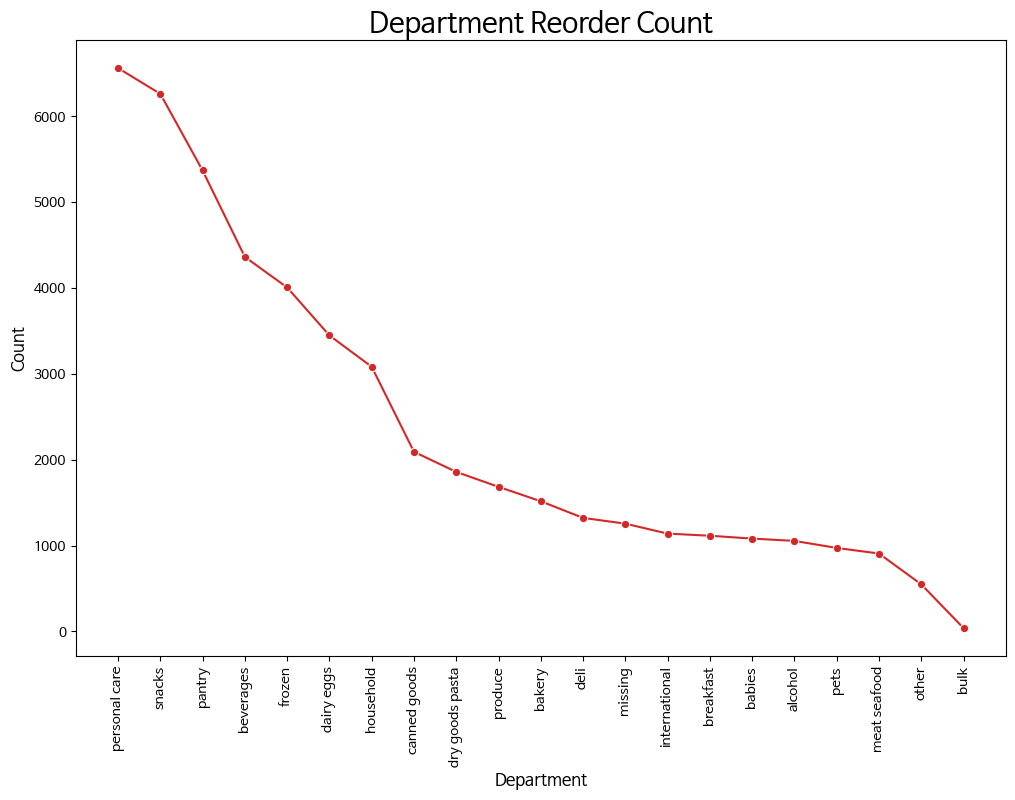

In [10]:
# Department Reorder

plt.figure(figsize=(12,8))
sns.lineplot(x='department', y = 'count', data= department_reorder_df, color=color[3], marker='o')
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Department', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('Department Reorder Count', fontsize=20)


Text(0.5, 1.0, 'Department Reorder Ratio')

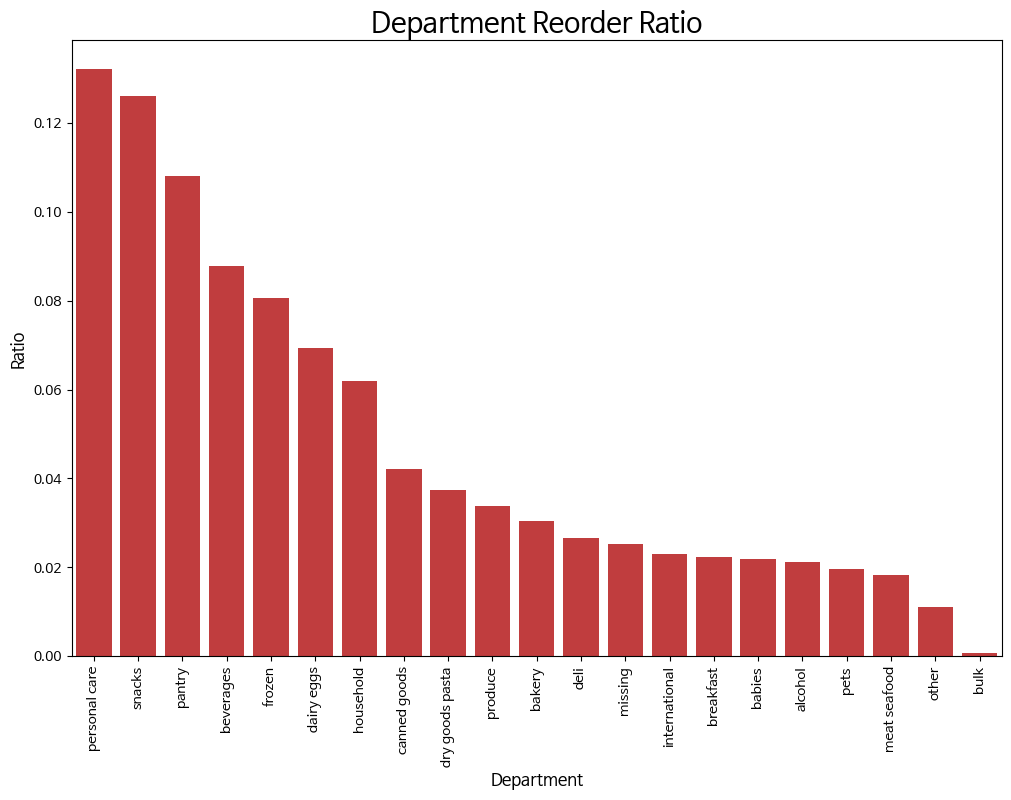

In [11]:
# Department Reorder

plt.figure(figsize=(12,8))
sns.barplot(x='department', y = 'ratio', data= department_reorder_df, color=color[3])
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('Ratio',fontsize=12)
plt.xlabel('Department', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('Department Reorder Ratio', fontsize=20)

Text(0.5, 1.0, 'Department Reorder Ratio')

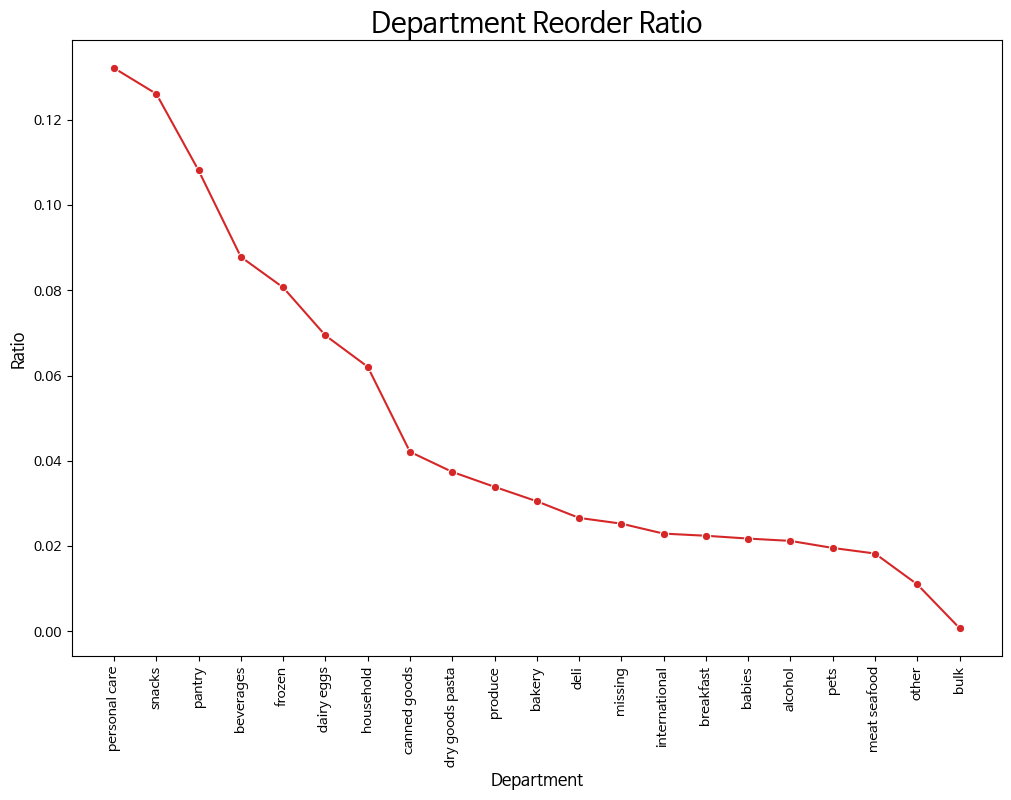

In [12]:
# Department Reorder

plt.figure(figsize=(12,8))
sns.lineplot(x='department', y = 'ratio', data= department_reorder_df, color=color[3], marker='o')
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('Ratio',fontsize=12)
plt.xlabel('Department', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('Department Reorder Ratio', fontsize=20)


In [44]:
# 급격히 꺾이는 지점이 household ~ canned goods
# 0~6행까지의 총 비율이 전체의 66%

department_top7 = department_reorder_df.iloc[0:7]
ratio_sum = department_top7['ratio'].sum()
ratio_sum

0.6662439358254323

In [45]:
# top7의 비율 확인

# department_top7['new_ratio'] = department_top7['ratio'] / ratio_sum
# department_top7

<ipython-input-45-d4672db2b4b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  department_top7['new_ratio'] = department_top7['ratio'] / ratio_sum


,department,count,ratio,new_ratio
0,personal care,6563,0.132113,0.198296
1,snacks,6263,0.126074,0.189232
2,pantry,5370,0.108098,0.162250
3,beverages,4363,0.087827,0.131825
4,frozen,4007,0.080661,0.121068
5,dairy eggs,3448,0.069408,0.104179
6,household,3083,0.062061,0.093150


In [13]:
department_top7 = department_reorder_df.iloc[0:7]
department_top7

,Unnamed: 0,department,count,ratio
0,0,personal care,6563,0.132113
1,1,snacks,6263,0.126074
2,2,pantry,5370,0.108098
3,3,beverages,4363,0.087827
4,4,frozen,4007,0.080661
5,5,dairy eggs,3448,0.069408
6,6,household,3083,0.062061


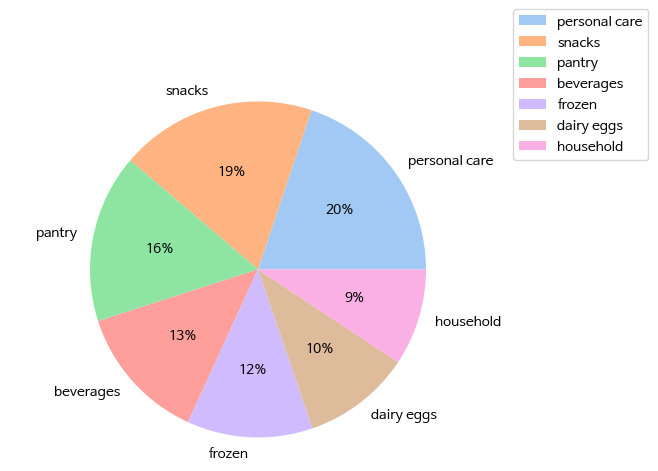

In [14]:
# top7 카테고리의 비율 파이차트로 확인

plt.pie(department_top7['ratio'], labels=department_top7['department'], autopct='%1.0f%%')
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.show()

# 고객 분류

시간별 분류 
- 1-9 새벽형
- 10-16 오전형
- 17-24 오후형

---

### 분류 후 살펴볼 것들
- 시간대별 사용자 비율
- 첫구매 고객 분포 확인
- 시간대별 재주문 주기 분석
---

- 시간대별 인기 제품, 카테고리


# all_df에서 테이블 쪼개기

In [12]:
# 총 32,434,489 데이터 중, 고유 user_id 는 206,209 개 존재
# 5,737,304 

all_df['user_id'].nunique()

206209

In [14]:
# 테이블을 주문과 제품으로 나누기

def extract_columns(df, columns):
    return df[columns]

order_columns = ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
popular_columns = ['order_id', 'user_id', 'order_hour_of_day', 'order_number', 'product_name', 'reordered', 'aisle', 'department']

df_order = extract_columns(all_df, order_columns)
df_popular = extract_columns(all_df, popular_columns)

In [15]:
# 주문테이블 고객을 시간별로 분류

am_order = df_order[(df_order['order_hour_of_day'] >= 1) & (df_order['order_hour_of_day'] <= 9)]
daytime_order = df_order[(df_order['order_hour_of_day'] >= 10) & (df_order['order_hour_of_day'] <= 16)]
pm_order = df_order[(df_order['order_hour_of_day'] == 0) | ((df_order['order_hour_of_day'] >= 17) & (df_order['order_hour_of_day'] <= 23))]


In [16]:
# 제품테이블 고객을 시간별로 분류

am_popular = df_popular[(df_popular['order_hour_of_day'] >= 1) & (df_popular['order_hour_of_day'] <= 9)]
daytime_popular = df_popular[(df_popular['order_hour_of_day'] >= 10) & (df_popular['order_hour_of_day'] <= 16)]
pm_popular = df_popular[(df_popular['order_hour_of_day'] == 0) | ((df_popular['order_hour_of_day'] >= 17) & (df_popular['order_hour_of_day'] <= 23))]

In [18]:
# 각 테이블 csv로 저장

am_order.to_csv('am_order.csv', index=False)
daytime_order.to_csv('daytime_order.csv', index=False)
pm_order.to_csv('pm_order.csv', index=False)
am_popular.to_csv('am_popular.csv', index=False)
daytime_popular.to_csv('daytime_popular.csv', index=False)
pm_popular.to_csv('pm_popular.csv', index=False)

# 쪼갠 테이블 불러오기

In [4]:
# 각 테이블 불러오기

am_order = pd.read_csv('/content/am_order.csv')
daytime_order = pd.read_csv('/content/daytime_order.csv')
pm_order = pd.read_csv('/content/pm_order.csv')
# am_popular = pd.read_csv('/content/am_popular.csv')
# daytime_popular = pd.read_csv('/content/daytime_popular.csv')
# pm_popular = pd.read_csv('/content/pm_popular.csv')

# 시간대별 사용자 비율 확인 


In [5]:
# order 테이블 중복값 제거

def drop_dupli(df):
    return df.drop_duplicates(inplace=False)

am_order = drop_dupli(am_order)
daytime_order = drop_dupli(daytime_order)
pm_order = drop_dupli(pm_order)

In [11]:
# 시간대별 사용자 비율 확인 

am_count = am_order.shape[0]
daytime_count = daytime_order.shape[0]
pm_count = pm_order.shape[0]

user_ratio = pd.DataFrame({'time': ['1 ~ 9', '10 ~ 16', '17 ~ 24'], 'count': [am_count, daytime_count, pm_count]})
user_ratio['ratio'] = user_ratio['count'] / user_ratio['count'].sum()
user_ratio

,time,count,ratio
0,1 ~ 9,565198,0.175807
1,10 ~ 16,1844908,0.573866
2,17 ~ 24,804768,0.250326


In [30]:
user_ratio['count'].sum()

3214874

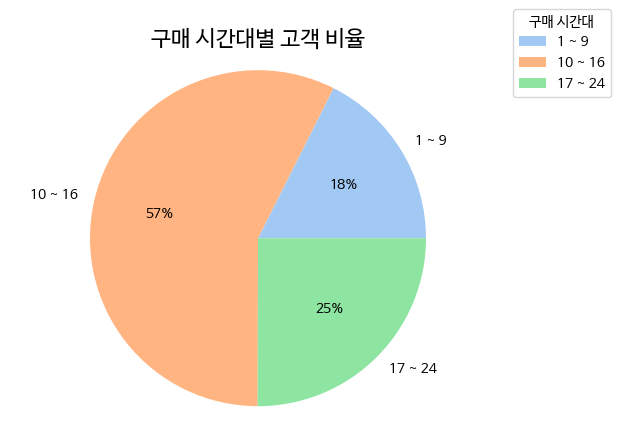

In [42]:
# 시간대별 사용자 비율 파이차트로 확인

plt.rc('font', family='NanumBarunGothic')
plt.pie(user_ratio['ratio'], labels=user_ratio['time'], autopct='%1.0f%%')
plt.axis('equal')
plt.legend(loc='center left', bbox_to_anchor=(1, 1), title='구매 시간대')
plt.title('구매 시간대별 고객 비율', fontsize=16)
plt.show()



# label 폰트크기 변경 방법
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# mpl.rcParams['font.size'] = 12

# plt.rc('font', family='NanumBarunGothic')
# plt.pie(user_ratio['ratio'], labels=user_ratio['time'], autopct='%1.0f%%')
# plt.axis('equal')
# plt.legend(loc='center left', bbox_to_anchor=(1, 1), title='구매 시간대')
# plt.title('구매 시간대별 고객 비율', fontsize=16)
# plt.show()

# order_columns - 첫구매 고객 비율 분석

In [10]:
# days_since_prior_order이 null 값인 데이터 = 이전 구매기록이 없는 데이터 = 첫구매 

am_order[am_order['days_since_prior_order'].isnull()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
67,57,34016,1,6,8,NaN
317,221,177947,1,5,8,NaN
405,245,70322,1,4,9,NaN
866,536,138768,1,1,9,NaN
1023,643,17076,1,0,8,NaN
...,...,...,...,...,...,...
5736872,3420775,89855,1,6,8,NaN
5736917,3420780,96255,1,1,9,NaN
5736954,3420792,88772,1,0,9,NaN
5736971,3420809,100168,1,6,5,NaN


In [12]:
# first_ratio : 시간대별 첫구매 고객 분포 (첫주문 수를 전체 주문수로 나눔)
# 어느 시간대에 첫구매 고객이 가장 많은가?

user_ratio['first_count'] = [am_order['days_since_prior_order'].isnull().sum(),
                             daytime_order['days_since_prior_order'].isnull().sum(),
                             pm_order['days_since_prior_order'].isnull().sum()]
                          
user_ratio['first_ratio'] = user_ratio['first_count'] / user_ratio['count'].sum()
user_ratio

,time,count,ratio,first_count,first_ratio
0,1 ~ 9,565198,0.175807,32588,0.010137
1,10 ~ 16,1844908,0.573866,118866,0.036974
2,17 ~ 24,804768,0.250326,54755,0.017032


In [13]:
# first_ratio_time : 시간대별 첫구매 고객 비율 (첫주문 수를 시간대별 주문 수로 나눔)
# 어느 시간대가 첫구매 고객 비율이 제일 높은가?

user_ratio['first_ratio_time'] = user_ratio['first_count'] / user_ratio['count']
user_ratio

,time,count,ratio,first_count,first_ratio,first_ratio_time
0,1 ~ 9,565198,0.175807,32588,0.010137,0.057658
1,10 ~ 16,1844908,0.573866,118866,0.036974,0.064429
2,17 ~ 24,804768,0.250326,54755,0.017032,0.068038


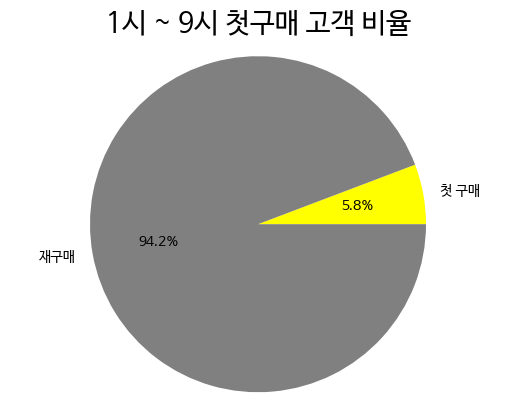

In [26]:
labels = ['첫 구매', '재구매']
sizes = [user_ratio.iloc[0, 5], 1 - user_ratio.iloc[0, 5]]
colors = ['yellow', 'gray']
plt.rc('font', family='NanumBarunGothic')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('1시 ~ 9시 첫구매 고객 비율', fontsize=20)
plt.show()

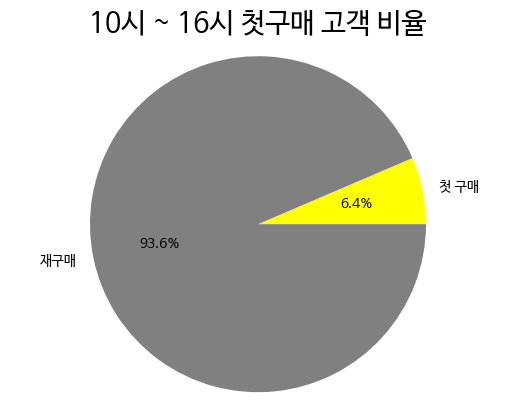

In [25]:
labels = ['첫 구매', '재구매']
sizes = [user_ratio.iloc[1, 5], 1 - user_ratio.iloc[1, 5]]
colors = ['yellow', 'gray']
plt.rc('font', family='NanumBarunGothic')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('10시 ~ 16시 첫구매 고객 비율', fontsize=20)
plt.show()

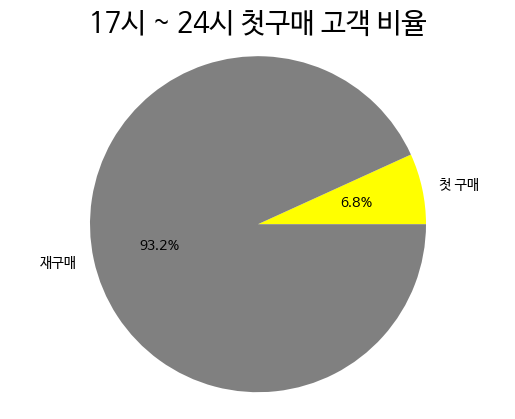

In [27]:
labels = ['첫 구매', '재구매']
sizes = [user_ratio.iloc[2, 5], 1 - user_ratio.iloc[2, 5]]
colors = ['yellow', 'gray']
plt.rc('font', family='NanumBarunGothic')
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('17시 ~ 24시 첫구매 고객 비율', fontsize=20)
plt.show()

# order_columns - 재주문 주기 분석
['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

Text(0.5, 1.0, '1~9시 재주문 주기')

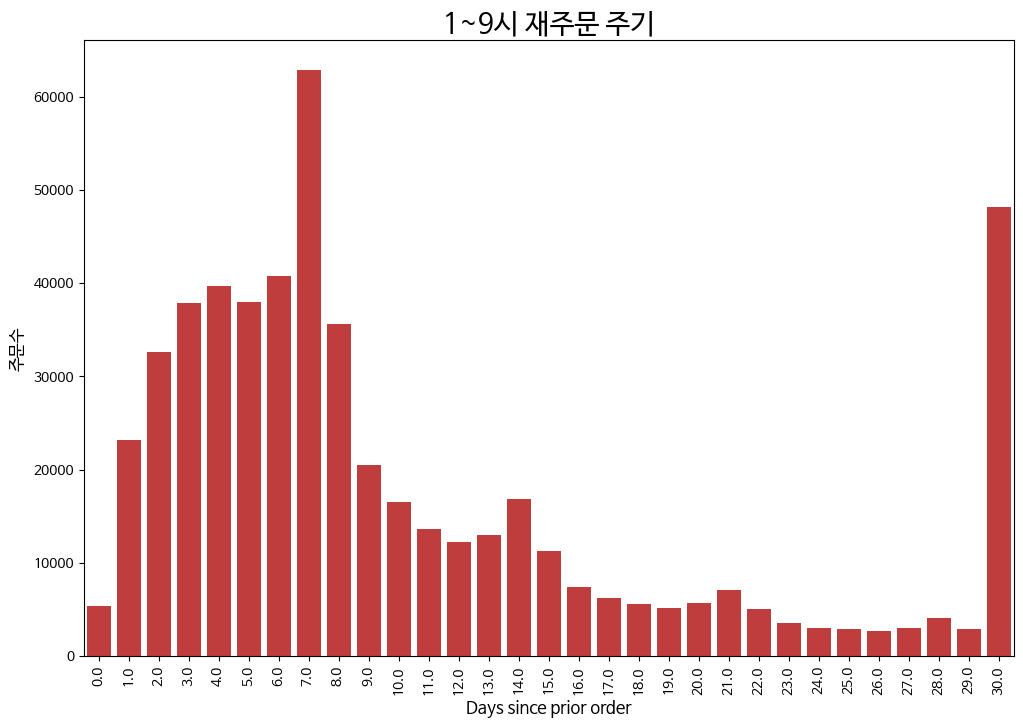

In [8]:
# 구매(재주문) 주기 분석

plt.figure(figsize=(12,8))
plt.rc('font', family='NanumBarunGothic')
sns.countplot(x='days_since_prior_order', data= am_order, color=color[3])
plt.ylabel('주문수',fontsize=12)
plt.xlabel('Days since prior order', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('1~9시 재주문 주기', fontsize=20)

Text(0.5, 1.0, '10~16시 재주문 주기')

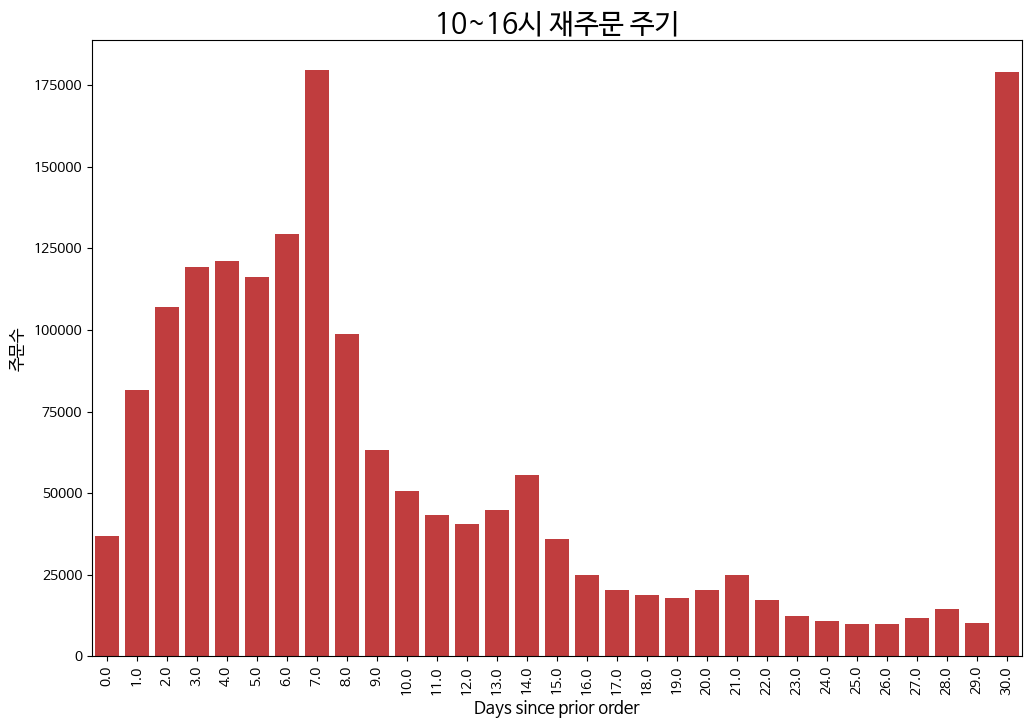

In [9]:
# 구매(재주문) 주기 분석

plt.figure(figsize=(12,8))
plt.rc('font', family='NanumBarunGothic')
sns.countplot(x='days_since_prior_order', data= daytime_order, color=color[3])
plt.ylabel('주문수',fontsize=12)
plt.xlabel('Days since prior order', fontsize = 12)
plt.xticks(rotation='vertical')
plt.title('10~16시 재주문 주기', fontsize=20)

In [72]:
def cycle(df):
  temp = df['days_since_prior_order'].value_counts(dropna = True, ascending = False).reset_index()
  temp.columns = ['days_since_prior_order','count']

  plt.figure(figsize=(12,8))
  sns.lineplot(x='days_since_prior_order', y = 'count', data=temp, color='k', marker='o')
  plt.rc('font', family='NanumBarunGothic')
  plt.ylabel('Count',fontsize=12)
  plt.xlabel('days_since_prior_order', fontsize = 12)
  plt.xticks([5, 7, 8, 14, 21, 28, 30], rotation='vertical')

Text(0.5, 1.0, '1시 ~ 9시 재주문 주기')

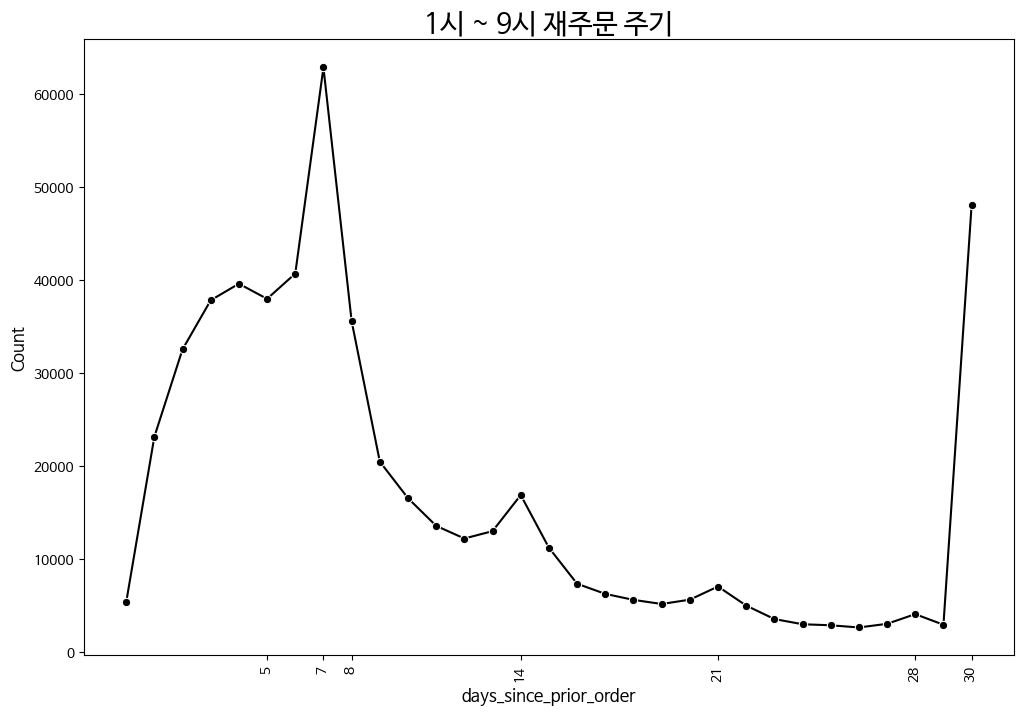

In [73]:
cycle(am_order)
plt.title('1시 ~ 9시 재주문 주기', fontsize=20)

Text(0.5, 1.0, '10시 ~ 16시 재주문 주기')

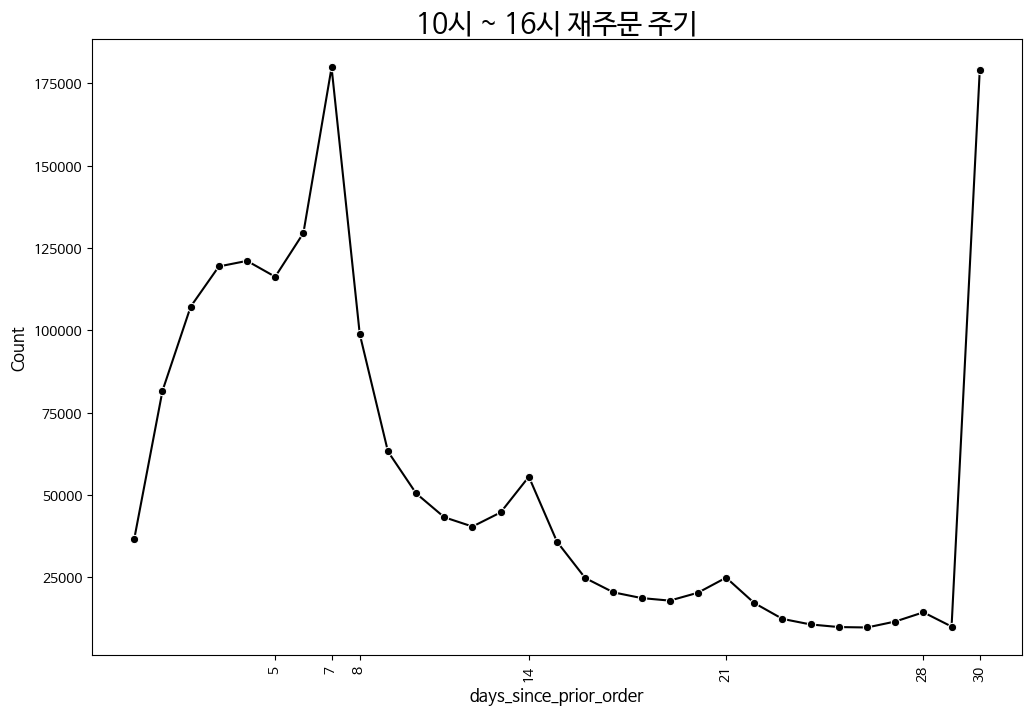

In [75]:
cycle(daytime_order)
plt.title('10시 ~ 16시 재주문 주기', fontsize=20)

Text(0.5, 1.0, '17시 ~ 24시 재주문 주기')

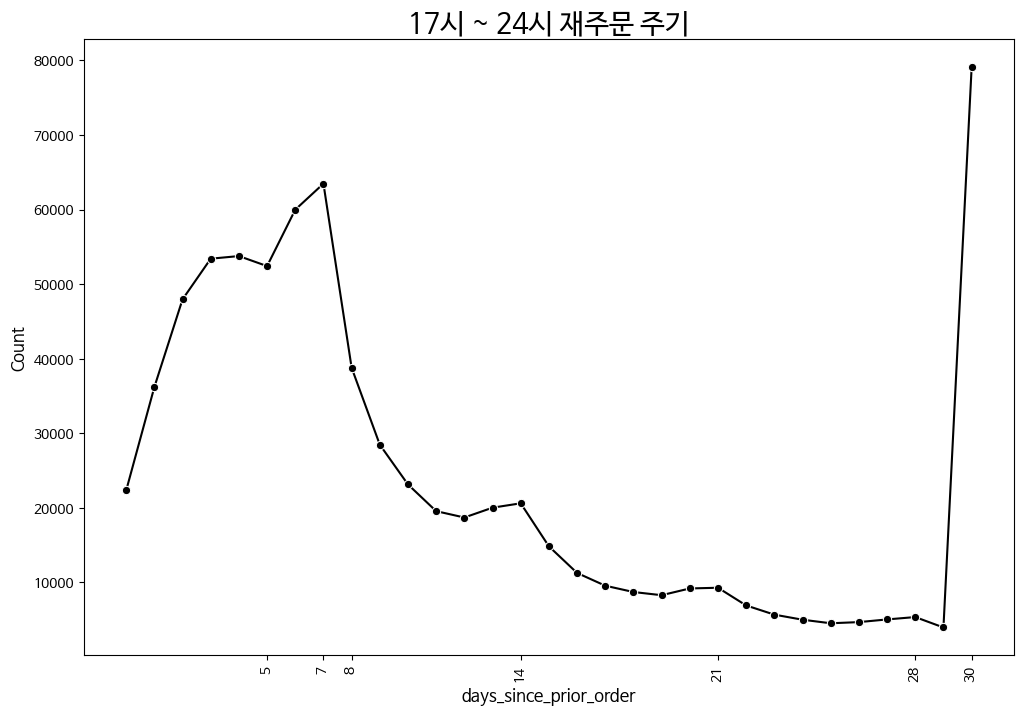

In [76]:
cycle(pm_order)
plt.title('17시 ~ 24시 재주문 주기', fontsize=20)

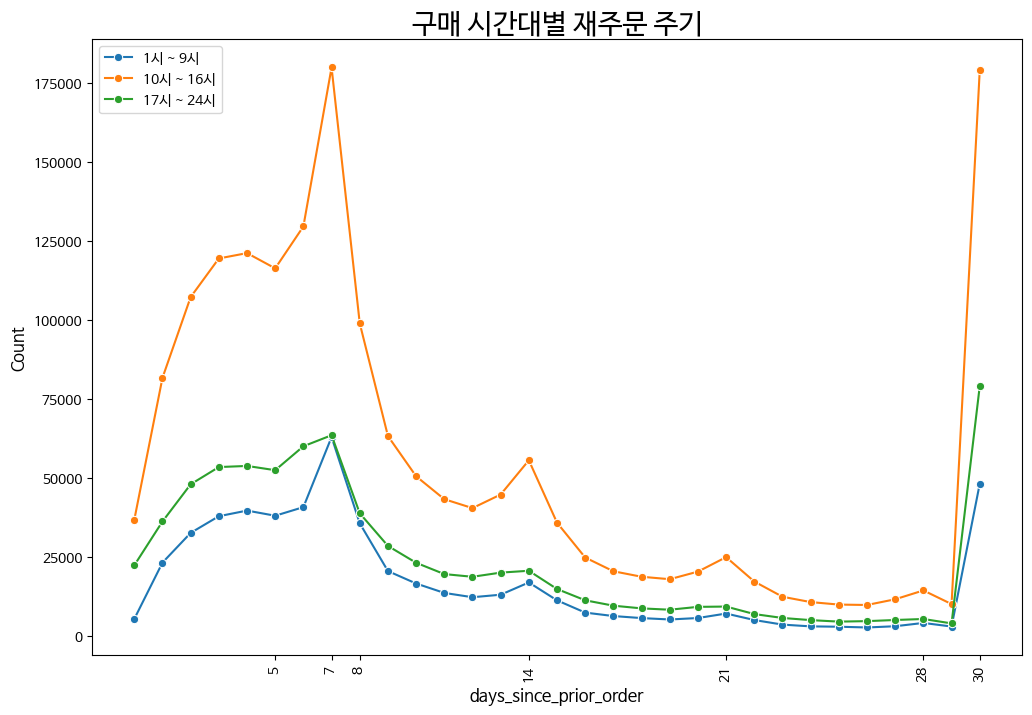

In [74]:
# 오전, 낮, 오후 시간대별 고객의 재주문 주기 겹쳐서 그리기

def count_srs(df):
  temp = df['days_since_prior_order'].value_counts(dropna = True, ascending = False).reset_index()
  temp.columns = ['days_since_prior_order','count']
  return  temp

am_order1 = count_srs(am_order)
daytime_order1 = count_srs(daytime_order)
pm_order1 = count_srs(pm_order)

color = ['tab:blue', 'tab:orange', 'tab:green']

plt.figure(figsize=(12,8))
sns.lineplot(x='days_since_prior_order', y='count', data=am_order1, color=color[0], label='1시 ~ 9시', marker='o')
sns.lineplot(x='days_since_prior_order', y='count', data=daytime_order1, color=color[1], label='10시 ~ 16시', marker='o')
sns.lineplot(x='days_since_prior_order', y='count', data=pm_order1, color=color[2], label='17시 ~ 24시', marker='o')
plt.rc('font', family='NanumBarunGothic')
plt.ylabel('Count', fontsize=12)
plt.xlabel('days_since_prior_order', fontsize=12)
plt.xticks([5, 7, 8, 14, 21, 28, 30], rotation='vertical')
plt.title('구매 시간대별 재주문 주기', fontsize=20)
plt.legend()
plt.show()

In [3]:
temp2 = pm_order['days_since_prior_order'].value_counts(ascending = False).reset_index()
temp2

,index,days_since_prior_order
0,30.0,786673
1,7.0,720536
2,6.0,659623
3,5.0,534145
4,4.0,513432
5,3.0,468507
6,8.0,422536
7,2.0,377722
8,9.0,301684
9,1.0,246544


# popular_columns 
['order_id', 'user_id', 'order_hour_of_day', 'order_number', 'product_name', 'reordered', 'aisle', 'department']